<a href="https://colab.research.google.com/github/KyriakiGeorgiou/KyriakiGeorgiou/blob/main/BoW_SIFT_ORB_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.datasets import cifar100
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Load Dataset

In [ ]:
N_CLASSES = 100

In [ ]:
# Load CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_training = len(X_train)
n_testing = len(X_test)

169001437/169001437 [==============================] - 2s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
y_train.shape


(50000, 1)

## Convert to grayscale

In [ ]:
import cv2

X_train_gray = []
for img in X_train:
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    X_train_gray.append(gray_img)

X_test_gray = []
for img in X_test:
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    X_test_gray.append(gray_img)


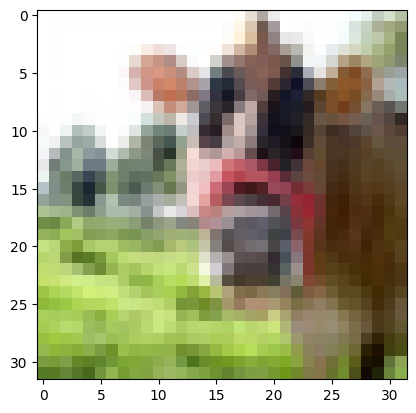

In [ ]:
plt.imshow(X_train[0])
plt.show()

## SIFT Feature Extraction

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

descriptors_train = []
for img in X_train_gray:
    kp, des = sift.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((1, 128))
    descriptors_train.append(des.astype(np.float32))

descriptors_test = []
for img in X_test_gray:
    kp, des = sift.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((1, 128))
    descriptors_test.append(des.astype(np.float32))


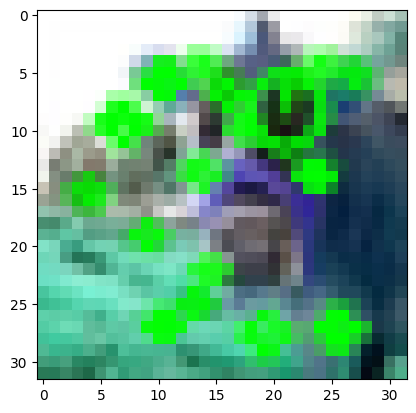

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image from the training set
img = X_train[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Extract SIFT features from the image
kp, des = sift.detectAndCompute(gray, None)

# Visualize the SIFT features
img_with_features = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img_with_features, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
cv2_imshow(descriptors_train[10])

## ORB

In [ ]:
import cv2

# Create an ORB object
orb = cv2.ORB_create(edgeThreshold=5, patchSize=10, nlevels=20)

# Extract ORB features from training set
descriptors_train = []
for img in X_train_gray:
    kp, des = orb.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((1, 32))
    descriptors_train.append(des.astype(np.float32))

# Extract ORB features from test set
descriptors_test = []
for img in X_test_gray:
    kp, des = orb.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((1, 32))
    descriptors_test.append(des.astype(np.float32))


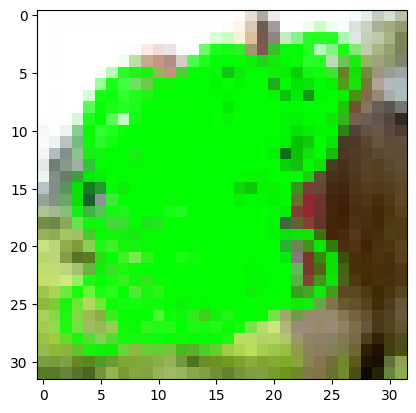

(<matplotlib.image.AxesImage at 0x7fe0d6936830>, None)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an example image from the training set

img = X_train[0]
# Initiate ORB detector
orb = cv2.ORB_create(edgeThreshold=5, patchSize=10, nlevels=20)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()



In [ ]:
# AFTER KMEANS FOR ORB
def compute_histogram(img_descriptors, vocabulary, descriptor_dim):
    # Find the closest visual word for each descriptor
    visual_words = kmeans.predict(img_descriptors)

    # Compute a histogram of visual words
    histogram, _ = np.histogram(visual_words, bins=np.arange(len(vocabulary)+1))

    # Normalize the histogram by the descriptor dimension
    histogram = histogram / descriptor_dim

    return histogram

descriptor_dim = 32 # 128 for SIFT, or 32 for ORB

histograms_train = []
for img_descriptors in descriptors_train:
    histogram = compute_histogram(img_descriptors, vocabulary, descriptor_dim)
    histograms_train.append(histogram)

histograms_test = []
for img_descriptors in descriptors_test:
    histogram = compute_histogram(img_descriptors, vocabulary, descriptor_dim)
    histograms_test.append(histogram)


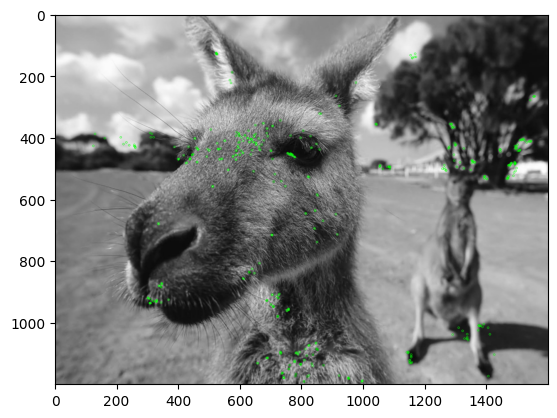

(<matplotlib.image.AxesImage at 0x7f173b7c7df0>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/Kangaroo_gray.jpeg', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create(edgeThreshold=5, patchSize=50, nlevels=20)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

## BRIEF

In [ ]:
# Initiate FAST object with default values
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()
dim = (256,256)

# Extract FAST features from training set
descriptors_train = []
for img in X_train_gray:
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # find the keypoints with STAR
    kp = star.detect(img,None)
    kp, des = brief.compute(img, kp)
    if des is None:
        des = np.zeros((1, 32))
    descriptors_train.append(des.astype(np.float32))

# Extract FAST features from test set
descriptors_test = []
for img in X_test_gray:
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # find the keypoints with STAR
    kp = star.detect(img,None)
    kp, des = brief.compute(img, kp)
    if des is None:
        des = np.zeros((1, 32))
    descriptors_test.append(des.astype(np.float32))


32
(31, 32)


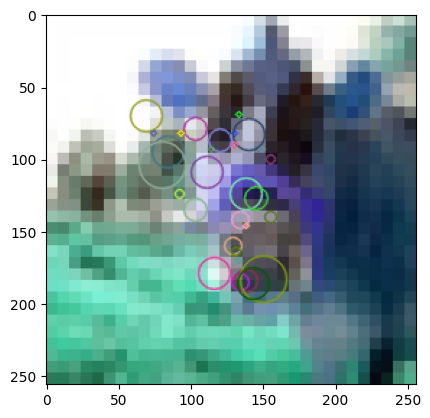

In [ ]:
# Load an example image from the training set
dim = (256,256)
img = X_train[0]
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(resized,None)
# Compute the descriptors for the detected keypoints
kp, des = brief.compute(resized, kp)
print( brief.descriptorSize() )
print( des.shape )
# Draw the keypoints on the image and display it
img_with_kp = cv2.drawKeypoints(resized, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
plt.show()

32
(28, 32)


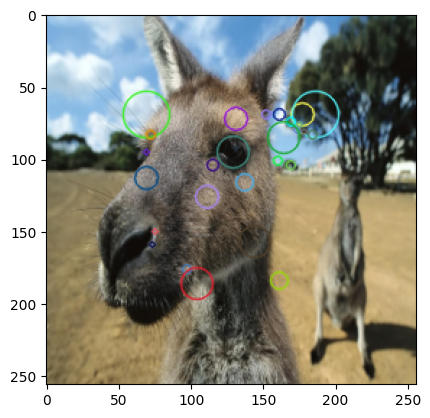

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
dim = (256,256)
# Load an example image
img = cv2.imread('/content/Kangaroo_gray.jpeg')
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(resized,None)
# Compute the descriptors for the detected keypoints
kp, des = brief.compute(resized, kp)
print( brief.descriptorSize() )
print( des.shape )
# Draw the keypoints on the image and display it
img_with_kp = cv2.drawKeypoints(resized, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
# AFTER KMEANS FOR BRIEF
def compute_histogram(img_descriptors, vocabulary, descriptor_dim):
    # Find the closest visual word for each descriptor
    visual_words = kmeans.predict(img_descriptors)

    # Compute a histogram of visual words
    histogram, _ = np.histogram(visual_words, bins=np.arange(len(vocabulary)+1))

    # Normalize the histogram by the descriptor dimension
    histogram = histogram / descriptor_dim

    return histogram

descriptor_dim = 32 # 128 for SIFT, or 32 for ORB

histograms_train = []
for img_descriptors in descriptors_train:
    histogram = compute_histogram(img_descriptors, vocabulary, descriptor_dim)
    histograms_train.append(histogram)

histograms_test = []
for img_descriptors in descriptors_test:
    histogram = compute_histogram(img_descriptors, vocabulary, descriptor_dim)
    histograms_test.append(histogram)


## KMeans

In [ ]:
from sklearn.cluster import KMeans

# Concatenate all SIFT descriptors into a single array
descriptors_all = np.concatenate(descriptors_train)

# Perform K-means clustering
kmeans = KMeans(n_clusters=300, random_state=42)
kmeans.fit(descriptors_all)

# Get the cluster centers as the visual words
vocabulary = kmeans.cluster_centers_.astype(np.float32)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


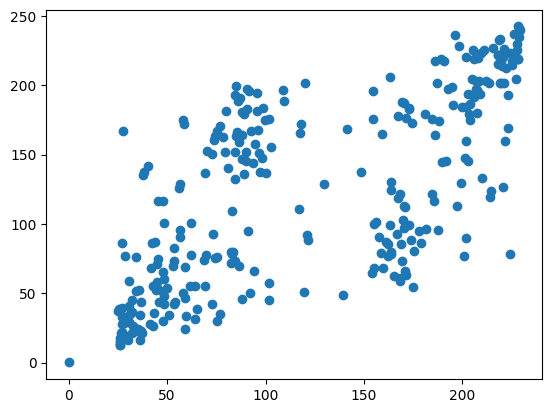

In [ ]:
plt.scatter(vocabulary[:,0], vocabulary[:,1])
plt.show()

In [ ]:
type(vocabulary.dtype)

numpy.dtype[float32]

In [ ]:
def compute_histogram(img_descriptors, vocabulary):
    # Find the closest visual word for each descriptor
    visual_words = kmeans.predict(img_descriptors)

    # Compute a histogram of visual words
    histogram, _ = np.histogram(visual_words, bins=np.arange(len(vocabulary)+1))

    return histogram


histograms_train = []
for img_descriptors in descriptors_train:
    histogram = compute_histogram(img_descriptors, vocabulary)
    histograms_train.append(histogram)

histograms_test = []
for img_descriptors in descriptors_test:
    histogram = compute_histogram(img_descriptors, vocabulary)
    histograms_test.append(histogram)


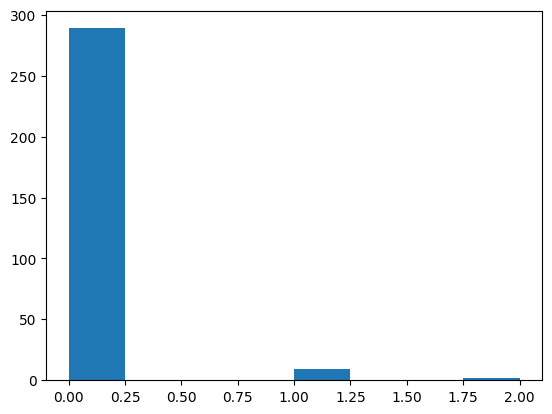

In [ ]:
plt.hist(histograms_train[1], bins = 8)
plt.show()

## Discriminative Algorithms

### SVM

In [ ]:
## SVM TRAINING
clf = SVC()
clf.fit(histograms_train, y_train)

# Compute the predictions on the test set
predictions = clf.predict(histograms_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0672


### Naive Bayes Classifier

In [ ]:
# Train a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(histograms_train, y_train)

# Predict labels for test set
y_pred = clf.predict(histograms_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.056


### KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the classifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(histograms_train, y_train)

# Predict labels for test set
y_pred = clf.predict(histograms_test)

# Test the classifier
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.0273


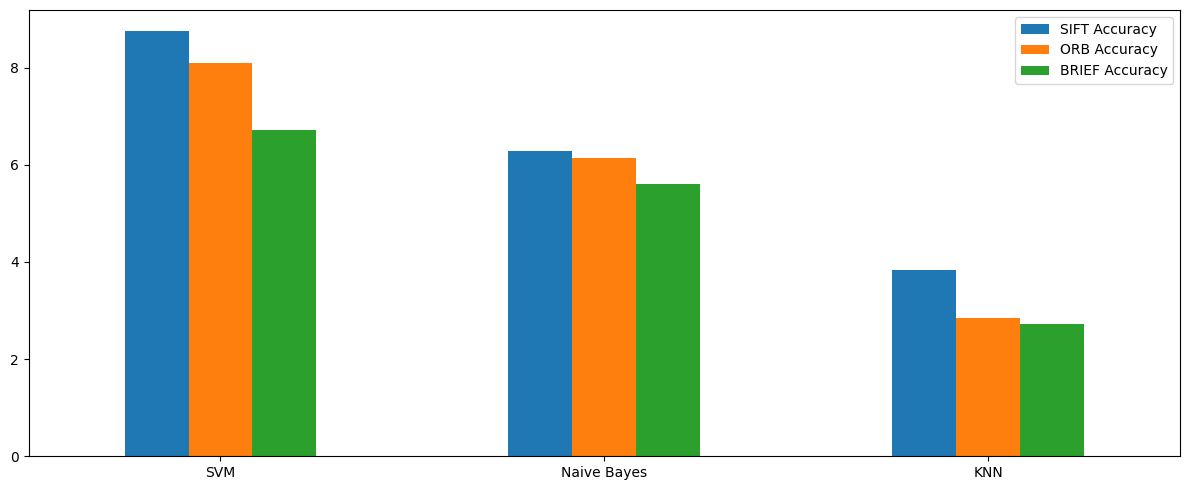

In [ ]:


import matplotlib.pyplot as plt
import pandas as pd

tags = ('SVM', 'Naive Bayes', 'KNN')
        
acc_sift = (8.75, 6.28, 3.84)
acc_orb = (8.1, 6.15, 2.85)
acc_brief = (6.72, 5.60, 2.73)

# create a dataframe
df = pd.DataFrame({"SIFT Accuracy": acc_sift, "ORB Accuracy": acc_orb, "BRIEF Accuracy": acc_brief}, index=tags)
df.plot.bar(rot=0, figsize=(12, 5))
plt.tight_layout() # fit labels etc. nicely into the plot
plt.show()

